Pat Tutka 
Week 4 Assignment

# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day.

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :)

The assignment is in the last cell.

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
bikes = pd.read_csv('C:\JHU_Python\data\cycletrips2016.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head(5)


,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


In [43]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour_of_day
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,23.98
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,23.95
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,23.95


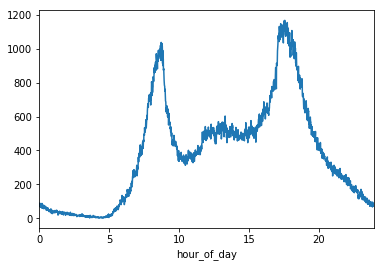

In [44]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()


In [45]:
hours.head(5)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour
hour_of_day,,,,,,,,,,,,
0.00,70,70,70,70,70,70,70,70,70,70,70,0.00
0.02,90,90,90,90,90,90,90,90,90,90,90,0.02
0.03,71,71,71,71,71,71,71,71,71,71,71,0.03
0.05,77,77,77,77,77,77,77,77,77,77,77,0.05
0.07,68,68,68,68,68,68,68,68,68,68,68,0.07


The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day.

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :)

The assignment is in the last cell.

# Assignment 4
Using the hours dataframe and the hour_of_day column, perform the following cells.

Explain the results in a paragraph + charts of to describe which model you'd recommend

# 1. Create 3 models fit to hour_of_day with varying polynomial degrees

In [46]:
hours.head(5)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour
hour_of_day,,,,,,,,,,,,
0.00,70,70,70,70,70,70,70,70,70,70,70,0.00
0.02,90,90,90,90,90,90,90,90,90,90,90,0.02
0.03,71,71,71,71,71,71,71,71,71,71,71,0.03
0.05,77,77,77,77,77,77,77,77,77,77,77,0.05
0.07,68,68,68,68,68,68,68,68,68,68,68,0.07


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

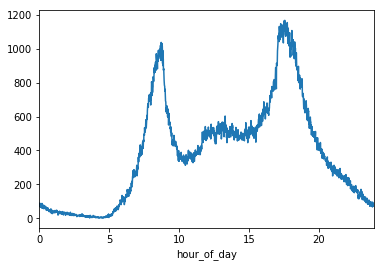

In [48]:
hours.start.plot()

This is the cell where I define X and Y

In [49]:
X = hours[['hour']] # the x variable is pulled from the new "hour column" in the hours dataframe. The hour column is a mirror of hour_of_day index column.
y = hours.start #count of trips aggregate

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(degree=10)
Xpoly1 = poly.fit_transform(X) 

In [52]:
Xpoly1.shape

(1440, 11)

In [53]:
linear2 = linear_model.LinearRegression()
linear2.fit(Xpoly1, y)
(linear2.coef_, linear2.intercept_)

(array([  0.00000000e+00,  -4.34347670e+02,   5.69923707e+02,
         -3.15933322e+02,   8.68761380e+01,  -1.31622016e+01,
          1.17426779e+00,  -6.32226060e-02,   2.01613106e-03,
         -3.49887948e-05,   2.53956728e-07]), 138.0783070857326)

In [54]:
import numpy as np

Text(0,0.5,'Number of Rides')

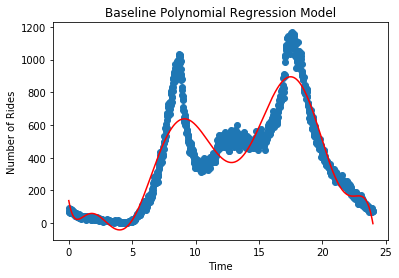

In [55]:
plt.scatter(hours.hour, hours.start)
plt.plot(X, np.dot(Xpoly1, linear2.coef_) + linear2.intercept_, c='r')
plt.title("Baseline Polynomial Regression Model")
plt.xlabel("Time")
plt.ylabel("Number of Rides")

In this model I attempted to fit a 10 degree polynominal regression, depicted in red, to the entire dataset. The model would not do a great job of predicting future points because during the peak times (morning rush hour and evening rush hour) the model under predicts by nearly 400 rides. In the next model I will try breaking down the dataset to specific ride times. 

In [56]:
morning_rush1 = hours.loc[5:9] #morning rush between 5 and 9am

In [57]:
X1 = morning_rush1[['hour']]
y1 = morning_rush1.start

In [58]:
poly = PolynomialFeatures(degree=6)
Xpoly2 = poly.fit_transform(X1) 

In [59]:
Xpoly2.shape

(241, 7)

In [60]:
linear3 = linear_model.LinearRegression()
linear3.fit(Xpoly2, y1)
(linear3.coef_, linear3.intercept_)

(array([  0.00000000e+00,   4.96326535e+05,  -1.90228585e+05,
          3.87521038e+04,  -4.42594963e+03,   2.68727808e+02,
         -6.77354313e+00]), -537653.28245787963)

Text(0,0.5,'Number of Rides')

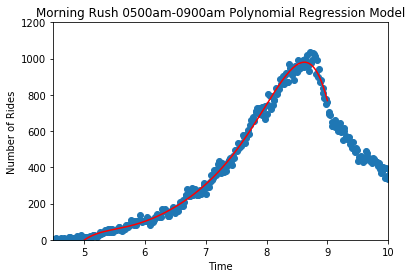

In [61]:
plt.scatter(hours.hour, hours.start)
plt.plot(X1, np.dot(Xpoly2, linear3.coef_) + linear3.intercept_, c='r')
plt.xlim(4.5, 10)
plt.ylim(0, 1200)
plt.title("Morning Rush 0500am-0900am Polynomial Regression Model")
plt.xlabel("Time")
plt.ylabel("Number of Rides")

The above model shows the breakdown of the first section of the dataframe, "morning rush 5am-9am" and plots a 6 degree polynomial regression. At the utmost peak between 8-9 am the model slightly underpredicts. I would rather the model underperform to cancel out outliers.

In [62]:
lunch_1 = hours.loc[9:15]
X2 = lunch_1[['hour']]
y2 = lunch_1.start


In [63]:
poly = PolynomialFeatures(degree=5)
Xpoly3 = poly.fit_transform(X2) 

In [64]:
Xpoly3.shape

(361, 6)

In [65]:
linear4 = linear_model.LinearRegression()
linear4.fit(Xpoly3, y2)
(linear4.coef_, linear4.intercept_)

(array([  0.00000000e+00,  -1.97232252e+03,  -1.71311202e+03,
          3.01733563e+02,  -1.85663079e+01,   3.97020591e-01]),
 35636.847441607693)

Text(0,0.5,'Number of Rides')

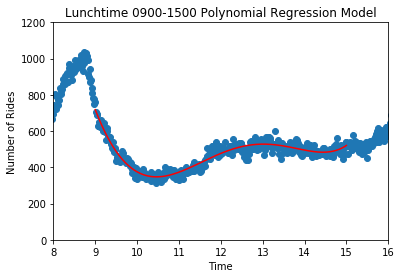

In [66]:
plt.scatter(hours.hour, hours.start)
plt.plot(X2, np.dot(Xpoly3, linear4.coef_) + linear4.intercept_, c='r')
plt.xlim(8, 16)
plt.ylim(0, 1200)
plt.title("Lunchtime 0900-1500 Polynomial Regression Model")
plt.xlabel("Time")
plt.ylabel("Number of Rides")

In this model I tried a 5 degree polynominal regression to fit to late morning and the lunch ridership. It appears that the predicted data fits the raw data very well. 

In [67]:
Evening_rush1 = hours.loc[15:17.5]
X3 = Evening_rush1[['hour']]
y3 = Evening_rush1.start
X3.shape

(151, 1)

In [68]:
poly = PolynomialFeatures(degree=4)
Xpoly4 = poly.fit_transform(X3) 
Xpoly4.shape

(151, 5)

In [69]:
linear5 = linear_model.LinearRegression()
linear5.fit(Xpoly4, y3)
(linear5.coef_, linear5.intercept_)

(array([  0.00000000e+00,   9.40307416e+05,  -8.68060375e+04,
          3.55375411e+03,  -5.44223023e+01]), -3811550.6778807594)

Text(0,0.5,'Number of Rides')

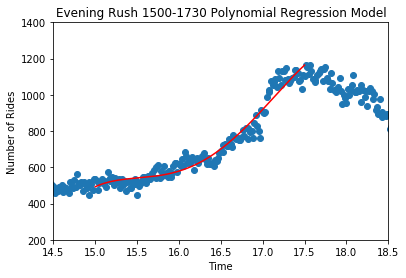

In [70]:
plt.scatter(hours.hour, hours.start)
plt.plot(X3, np.dot(Xpoly4, linear5.coef_) + linear5.intercept_, c='r')
plt.xlim(14.5, 18.5)
plt.ylim(200, 1400)
plt.title("Evening Rush 1500-1730 Polynomial Regression Model")
plt.xlabel("Time")
plt.ylabel("Number of Rides")

The evening rush polynomial regression model is simplier and more linear because on average as I chose a 4 degree polynomial regression model to fit the data. Since this is probably the timeframe that Capitol Bike Share makes the most profit I want to fit the best model to the data. In addition, later in the assignment I choose this model to create three ridge regression models against. 

In [71]:
Evening_= hours.loc[17.5:24]
X4 = Evening_[['hour']]
y4 = Evening_.start

In [72]:
poly = PolynomialFeatures(degree=3)
Xpoly5 = poly.fit_transform(X4) 
Xpoly5.shape

(390, 4)

In [73]:
linear6 = linear_model.LinearRegression()
linear6.fit(Xpoly5, y4)
(linear6.coef_, linear6.intercept_)

(array([  0.00000000e+00,  -7.07212493e+03,   3.03855890e+02,
         -4.38919523e+00]), 55461.021095168689)

Text(0,0.5,'Number of Rides')

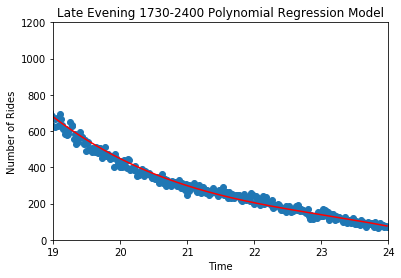

In [74]:
plt.scatter(hours.hour, hours.start)
plt.plot(X4, np.dot(Xpoly5, linear6.coef_) + linear6.intercept_, c='r')
plt.xlim(19, 24)
plt.ylim(0, 1200)
plt.title("Late Evening 1730-2400 Polynomial Regression Model")
plt.xlabel("Time")
plt.ylabel("Number of Rides")

For the most part I believe this model does a great job of predicting the points. I decided to keep the model very simple and ran a 3 degree polynominal regression. It appears that the predicted points cuts through the data well. This  model also would be a good candidate for running a ridge regression on as well to see how it predicts. 

# 2. Choose one of the polynomial models and create 3 new models fit to hour_of_day with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values

I chose the evening rush model to run a ridge regression against. 

Text(0,0.5,'Number of Rides')

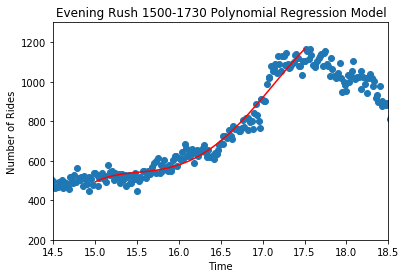

In [75]:
plt.scatter(hours.hour, hours.start)
plt.plot(X3, np.dot(Xpoly4, linear5.coef_) + linear5.intercept_, c='r')
plt.xlim(14.5, 18.5)
plt.ylim(200, 1300)
plt.title("Evening Rush 1500-1730 Polynomial Regression Model")
plt.xlabel("Time")
plt.ylabel("Number of Rides")

In [76]:
#Evening_rush1 = hours.loc[15:17.5] These are the variable parameters I am basing my ridge model on. 1500-1730.
#X3 = Evening_rush1[['hour']]
#y3 = Evening_rush1.start
#poly = PolynomialFeatures(degree=4)
#Xpoly4 = poly.fit_transform(X3) 

ridge_evening1 = linear_model.Ridge(alpha=1)
ridge_evening1.fit(Xpoly4, y3)
ridge_evening1.coef_, ridge_evening1.intercept_

(array([ 0.        ,  0.23907684,  2.19079787, -4.98984631,  0.24060762]),
 4690.4710420356014)

Text(0,0.5,'Number of Rides')

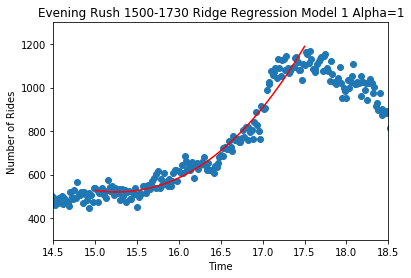

In [77]:
plt.scatter(hours.hour, hours.start)
#plt.plot(X3, np.dot(Xpoly4, linear5.coef_) + linear5.intercept_, c='black')
plt.plot(X3, np.dot(Xpoly4, ridge_evening1.coef_) + ridge_evening1.intercept_, c='r')
plt.xlim(14.5, 18.5)
plt.ylim(300, 1300)
plt.title("Evening Rush 1500-1730 Ridge Regression Model 1 Alpha=1")
plt.xlabel("Time")
plt.ylabel("Number of Rides")

In the first model I set the alpha parameter to 1 to observe the amount of skrinkage the model produced. It appears the model slightly underpredicts ridership between 1715-1730 but it is very minimal. I like that the model cuts through the majority of the data between 1500-1700. I would be curious to add 25 or so points to the data to see how the model predicts those points.  

In [78]:
ridge_evening2 = linear_model.Ridge(alpha=5)
ridge_evening2.fit(Xpoly4, y3)
ridge_evening2.coef_, ridge_evening2.intercept_

(array([ 0.        ,  0.03419406,  0.13382288, -4.81935426,  0.2366504 ]),
 4781.3289043350878)

Text(0,0.5,'Number of Rides')

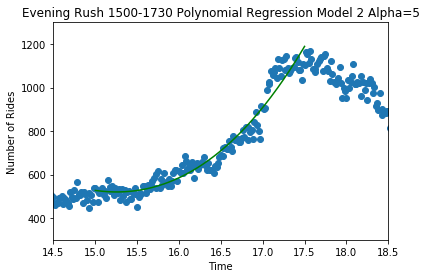

In [79]:
plt.scatter(hours.hour, hours.start)
#plt.plot(X3, np.dot(Xpoly4, linear5.coef_) + linear5.intercept_, c='black')
#plt.plot(X3, np.dot(Xpoly4, ridge_evening1.coef_) + ridge_evening1.intercept_, c='black')
plt.plot(X3, np.dot(Xpoly4, ridge_evening2.coef_) + ridge_evening2.intercept_, c='g')
plt.xlim(14.5, 18.5)
plt.ylim(300, 1300)
plt.title("Evening Rush 1500-1730 Polynomial Regression Model 2 Alpha=5")
plt.xlabel("Time")
plt.ylabel("Number of Rides")

In the second model the alpha equaled 5 and is represented by a green line. I commented out the first ridge model and was surprised to see that the models did not vary much at all. As expected the regression coefficient values decreased to flatten the model but it appears that it did not change the scatterplot. 

In [80]:
ridge_evening3 = linear_model.Ridge(alpha=0.1)
ridge_evening3.fit(Xpoly4, y3)
ridge_evening3.coef_, ridge_evening3.intercept_


(array([  0.        ,   2.15105661,  21.09564535,  -6.5482048 ,   0.27658116]),
 3845.9001988487857)

Text(0,0.5,'Number of Rides')

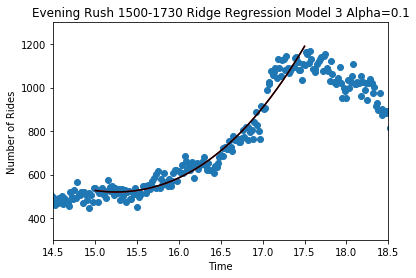

In [81]:
plt.scatter(hours.hour, hours.start)
#plt.plot(X3, np.dot(Xpoly4, linear5.coef_) + linear5.intercept_, c='y')
plt.plot(X3, np.dot(Xpoly4, ridge_evening2.coef_) + ridge_evening2.intercept_, c='r')
plt.plot(X3, np.dot(Xpoly4, ridge_evening3.coef_) + ridge_evening3.intercept_, c='black')
plt.xlim(14.5, 18.5)
plt.ylim(300, 1300)
plt.title("Evening Rush 1500-1730 Ridge Regression Model 3 Alpha=0.1")
plt.xlabel("Time")
plt.ylabel("Number of Rides")

In the final model I decided to reduce the alpha score to 0.1 represented in black and compare it with model two with an alpha score of 5 represented in red. I was once again surprised to see that the line did not change very much, even though the coefficients changed. I think if I changed the scale of the scatterplot that we would see a small change in the regression line. 
I think the Alpha 1 ridge regression model is the best fit to the data overall and would be my recommendation. The polynomial models way overfit the data and would be difficult to control. I think ridge regression would be a nice fit during the rush hour timeframes because it gives some degree of freedom to the model. 